In [1]:
import numpy as np
import pandas as pd
import warnings
import math
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('/Users/akankshitadash/Desktop/Programs/MA4199/Task 1/MachineLearning/Code/'+
                 'Replicate2/TE_chrE_filtered_mockT0added.txt',sep='\t')


In [12]:
df.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4,TE5,foldTE1,foldTE2,foldTE3,foldTE4,foldTE5
0,NM_001003803,ATP5S,1.770882,1.771663,1.623404,1.465394,0.647103,1.930694,0.000782,-0.147478,-0.305488,-1.123778,0.159812
1,NM_001003800,BICD2,-0.722232,-0.606712,-0.590100,-0.680005,-0.491531,0.363802,0.115520,0.132132,0.042227,0.230701,1.086034
2,NM_016640,MRPS30,0.402693,0.655493,0.615126,0.244848,0.162678,0.974128,0.252801,0.212433,-0.157844,-0.240015,0.571436
3,NM_001080825,TMEM120B,0.713396,0.902133,1.213467,0.150521,0.884143,2.177961,0.188737,0.500071,-0.562875,0.170746,1.464565
4,NM_001008781,FAT3,-0.859451,-0.818037,-1.006214,-0.824733,-1.089780,-0.158767,0.041414,-0.146763,0.034719,-0.230329,0.700684


In [13]:
df.keys()

Index(['AccNum', 'GeneName', 'TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'TE5',
       'foldTE1', 'foldTE2', 'foldTE3', 'foldTE4', 'foldTE5'],
      dtype='object')

In [14]:
df.shape

(5801, 13)

/Users/akankshitadash/Desktop/Replicate2/MockT0Added/4/AccNum1.txt
1600 1600
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/4/AccNum2.txt
1446 1446
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/4/AccNum3.txt
2343 2343
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/4/AccNum4.txt
412 412
[1600, 1446, 2343, 412]
[1600, 3046, 5389, 5801]


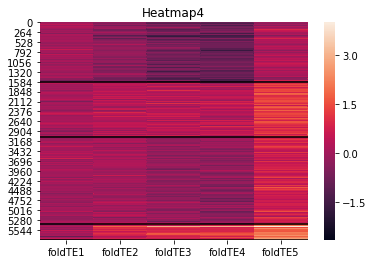

/Users/akankshitadash/Desktop/Replicate2/MockT0Added/5/AccNum1.txt
283 283
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/5/AccNum2.txt
1904 1904
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/5/AccNum3.txt
1640 1640
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/5/AccNum4.txt
1021 1021
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/5/AccNum5.txt
953 953
[283, 1904, 1640, 1021, 953]
[283, 2187, 3827, 4848, 5801]


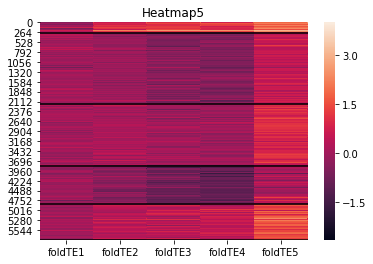

/Users/akankshitadash/Desktop/Replicate2/MockT0Added/6/AccNum1.txt
869 869
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/6/AccNum2.txt
933 933
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/6/AccNum3.txt
1772 1772
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/6/AccNum4.txt
1051 1051
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/6/AccNum5.txt
899 899
/Users/akankshitadash/Desktop/Replicate2/MockT0Added/6/AccNum6.txt
277 277
[869, 933, 1772, 1051, 899, 277]
[869, 1802, 3574, 4625, 5524, 5801]


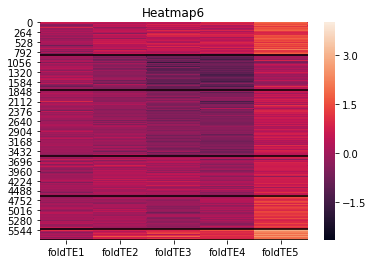

In [15]:
path_beginning =  '/Users/akankshitadash/Desktop/Replicate2/MockT0Added/'
num = ['4','5','6']
for i in num: #cluster number
    path = path_beginning+i+'/'
    clusters = [[] for i in range(int(i))]
    indices = []
    for j in range(int(i)): #sub-cluster within clusters
        path_load=path+'AccNum'+str(j+1)+'.txt'
        print(path_load)
        f = open(path_load, "r")
        idx=0
        for x in f:
            if(not df.loc[df['AccNum'] == x[:-1]].empty):
                idx+=1
                list_new = df.loc[df['AccNum'] == x[:-1]][['foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4','foldTE5']].values[0]
                clusters[int(j)-int(i)].append(list_new)
        indices.append(len(clusters[int(j)-int(i)]))
        print(len(clusters[int(j)-int(i)]),idx)     
    print(indices)
    for j in range(1,int(i)):
        indices[j]+=indices[j-1]
    print(indices)
    stacked = []
    for cluster in clusters:
        for row in cluster:
            stacked.append(row)

    ax = sns.heatmap(stacked,xticklabels=['foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4','foldTE5'])
    ax.hlines(indices, *ax.get_xlim())
    plt.title('Heatmap'+str(i))
    plt.savefig(path_beginning+'Heatmap'+str(i)+'.png')
    plt.show()

In [ ]:
# print(indices)

In [ ]:
# for i in range(1,int(i)):
#     indices[i]+=indices[i-1]

In [ ]:
# print(indices)

In [ ]:
# stacked = []
# for cluster in clusters:
#     for row in cluster:
#         stacked.append(row)

# ax = sns.heatmap(stacked,xticklabels=['foldTE1',
#        'foldTE2', 'foldTE3', 'foldTE4'])
# ax.hlines(indices, *ax.get_xlim())
# plt.savefig('/Users/akankshitadash/Desktop/Mock/Heatmap'+str(i)+'.png')
# plt.show()

In [ ]:
# def plot_heatmap(X,idx,indices,path):
#     ax = sns.heatmap(X,xticklabels=['TE0','TE1', 'TE2', 'TE3','TE4'])
#     plt.title('Heatmap'+str(idx))
#     ax.hlines(indices, *ax.get_xlim())
#     plt.savefig(path)
#     plt.show()
    
# for idx,cluster in enumerate(clusters):
#     path = '/Users/akankshitadash/Desktop/Bayesian Networks/TE_chrE/4/'+str(idx+4)
#     plot_heatmap(cluster,idx+4,indices[idx],path)